In [190]:
import pandas as pd
import altair as alt
import datetime as dt

In [192]:
df = pd.read_csv('../data/supermarket_sales.csv',
                 parse_dates = {'Date_time': ['Date', 'Time']})
df.head()

,Date_time,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,2019-01-05 13:08:00,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,2019-03-08 10:29:00,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,2019-03-03 13:23:00,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,2019-01-27 20:33:00,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,2019-02-08 10:37:00,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3


In [193]:
# Add day of the week
df['Day_of_week'] = df['Date_time'].dt.weekday_name

In [194]:
# Assign transactions between 09:00-12:59 as 'Morning'
morning = df.set_index('Date_time').between_time('09:00', '12:59')
morning['Time_of_day'] = 'Morning'

# Assign transactions between 13:00-16:59 as 'Afternoon'
afternoon = df.set_index('Date_time').between_time('13:00', '16:59')
afternoon['Time_of_day'] = 'Afternoon'

# Assign transactions between 17:00-20:59 as 'Evening'
evening = df.set_index('Date_time').between_time('17:00', '20:59')
evening['Time_of_day'] = 'Evening'

new_df = pd.concat([morning, afternoon, evening])

In [195]:
# plot functions 
def update_graph(DayofWeek, TimeofDay, branch_index, func, pltTitle):
    '''
    plot barplots of different functions for specific DayofWeek and TimeofDay 
    
    Parameters
    ---
    DayofWeek: Str
    TimeofDay: Str
    branch_index: Str
    func: Str
    pltTitle: Str
    '''
    chart = alt.Chart(new_df).mark_bar(color = "cornflowerblue").encode(
            alt.X('Product line:N'),
            alt.Y(func, type ='quantitative'),
            tooltip=[alt.Tooltip('Product line', title = 'Day of the week'),
                     alt.Tooltip(func, title = pltTitle)]
        ).transform_filter(
            alt.FieldEqualPredicate(field='Branch', equal= branch_index)
        ).transform_filter(
            alt.FieldEqualPredicate(field='Day_of_week', equal= DayofWeek)
        ).transform_filter(
            alt.FieldEqualPredicate(field='Time_of_day', equal= TimeofDay)
        ).properties(width=280, height=200, title= pltTitle)
    return chart

In [196]:
def con_plt(DayofWeek, TimeofDay, branch_index):
    plt1 = update_graph(DayofWeek, TimeofDay, branch_index, 'sum(Total)', "Total Sales")
    plt2 = update_graph(DayofWeek, TimeofDay, branch_index, 'count(Invoice ID)', "Customer Traffic")
    plt3 = update_graph(DayofWeek, TimeofDay, branch_index, "mean(Total)", "Average Transaction Size")
    plt4 = update_graph(DayofWeek, TimeofDay, branch_index, "mean(Rating)", "Average Satisfaction")
    
    return alt.concat(plt1, plt2, plt3, plt4, columns = 2)

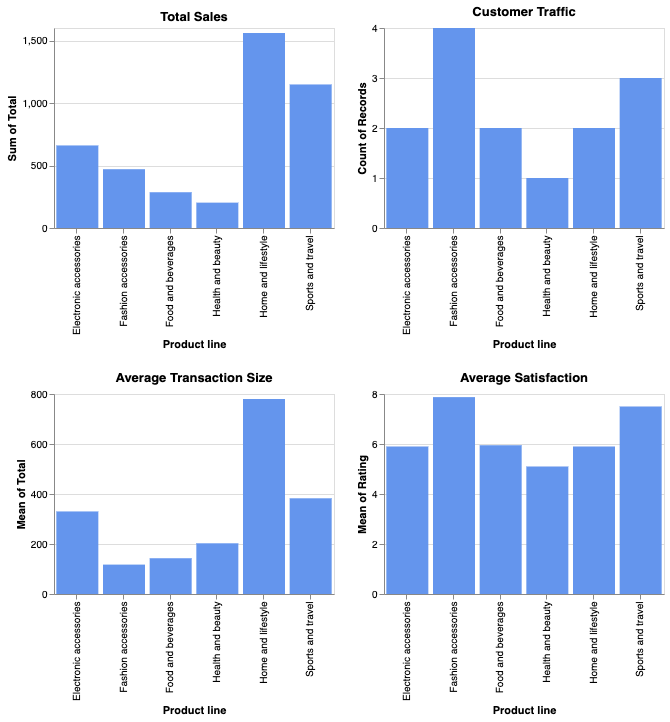

In [198]:
# Set DayofWeek and TimeofDay and Branch to draw barplots 
DayofWeek = "Friday" # dropdown 
TimeofDay = "Morning" # dropdown
branch_index = "A" # tab 
con_plt(DayofWeek, TimeofDay, branch_index)